# Audio Data augmentation

In this Notebook we will do data augmentation for sound files (.wav).

With a list of .wav files as input, we will do Data Augmentation to get a larger dataset to train Deep Learning models.

Four augmentations are used here:
1. Noise Addition - Adding noise to the sound sample
2. Shifting Sound wave - Shifting the sound sample 
3. Time-stretching - Making the sample longer/shorter
4. Pitch-shifting - Changing the pitch of the sample



## Contents
0. Import the packages
1. Import the data
2. Do data augmentation for 1 file at the time - including visualisations
3. Data augmentation for a list of files (no visualisations) 

<i>Partly based on: https://gist.github.com/keyurparalkar</i>

## 0. Import the packages

In [3]:
import glob
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal
from scipy.io import wavfile
import soundfile as sf

## 1. Import the data 

In [ ]:
!cd <change to your path with audiofiles>

In [1]:
# import the data and assign to variable. Please change the path!
import glob
wav_files = glob.glob('*.wav') #change datapath i
wav_files

['11k16bitpcm.wav',
 'claxon_1m.wav',
 'claxon_close.wav',
 'claxon_freesound.wav',
 'claxon_iphone.wav',
 'claxon_michiel.wav',
 'example.wav',
 'file.wav',
 'loudness.wav',
 'miaow_16k.wav',
 'my-audio.wav',
 'my_test.wav',
 'my_wav.wav',
 'noise_add.wav',
 'out.wav',
 'output.wav',
 'robot0.wav',
 'robot1.wav',
 'robot2.wav',
 'robot3.wav',
 'silence.wav',
 'speech_whistling2.wav',
 'test.wav',
 'test2.wav',
 'test3.wav',
 'tone_220.wav',
 'welcome.wav']

## 2. Audio Data Augmentation for 1 file with visualisations

In [4]:
def plot_spec(data:np.array,sr:int,title:str, fpath:str) -> None:
  label = str(fpath).split('/')[-1].split('_')[0]
  fig, ax = plt.subplots(1,2,figsize=(15,4))
  ax[0].title.set_text(f'{title} / Label: {label}')
  ax[0].specgram(data,Fs=2)
  # fig.savefig('temp1.png',bbox_inches="tight",pad_inches=0)
  ax[1].set_ylabel('Amplitude')
  ax[1].plot(np.linspace(0,1,len(data)), data)

In [57]:
file_path = wav_files[1] # please change value to other files of the list
wav, sr = librosa.load(file_path,sr=None)

In [58]:
import glob, os
file, ext = os.path.splitext(file_path)
file

'sheets01'

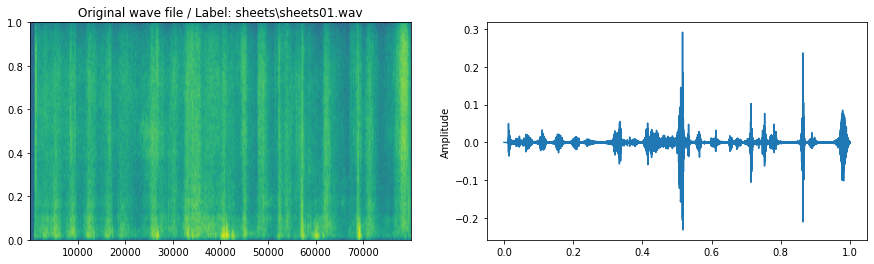

In [6]:
plot_spec(wav,sr,'Original wave file',file_path)
ipd.Audio(data=wav,rate=sr)

In [7]:
print('The sample rate is: '+ str(sr))

The sample rate is: 16000


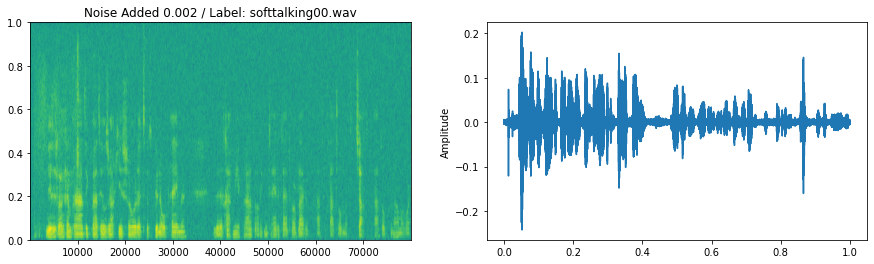

In [89]:
'''
Noise addition using normal distribution with mean = 0 and std =1
Permissible noise factor value = x > 0.004
'''
wav_n = wav + 0.002*np.random.normal(0,1,len(wav))
plot_spec(wav_n,sr,'Noise Added 0.002',fpath=file_path)
ipd.Audio(data=wav_n,rate=sr)
#sf.write('./augmented/'+ file+ '_noise_add.wav', wav_n, sr) #uncomment to save as new wav

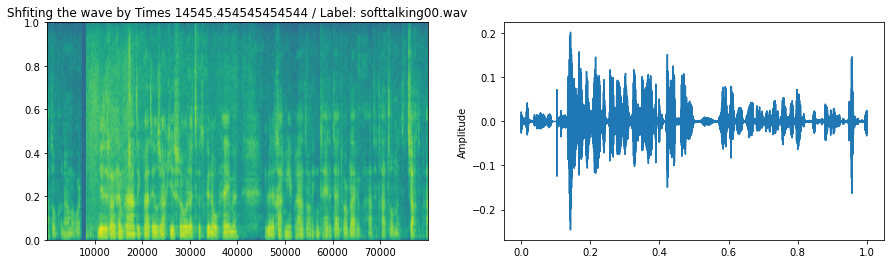

In [88]:
#Shifting the sound wave
'''
Permissible factor values = sr/10
'''

wav_roll = np.roll(wav,int(sr/1.1))
plot_spec(data=wav_roll,sr=sr,title=f'Shfiting the wave by Times {sr/1.1}',fpath=file_path)
ipd.Audio(wav_roll,rate=sr)
#sf.write('./augmented/'+ file+ '_roll3.wav', wav_roll, sr)#uncomment to save as new wav

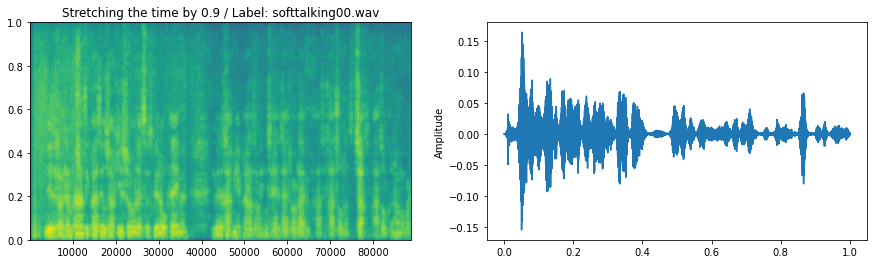

In [91]:
#Time-stretching the wave
'''
Permissible factor values = 0 < x < 1.0
'''

factor = 0.9
wav_time_stch = librosa.effects.time_stretch(wav,factor)
plot_spec(data=wav_time_stch,sr=sr,title=f'Stretching the time by {factor}',fpath=file_path)
ipd.Audio(wav_time_stch,rate=sr)
#sf.write('./augmented/'+ file+ '_time_stretch.wav', wav_time_stch, sr) #uncomment to write as new wav

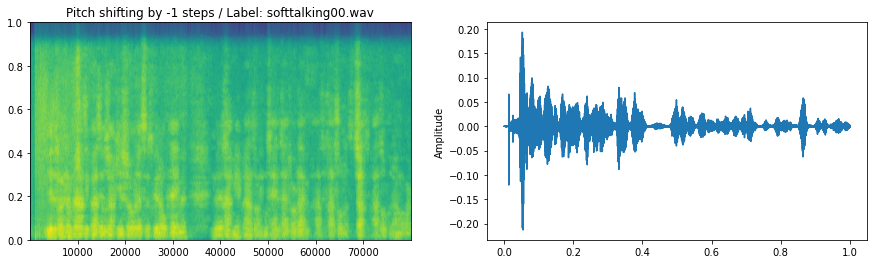

In [90]:
#pitch shifting of wav higer
'''
Permissible factor values = -5 <= x <= 5
'''
wav_pitch_sf = librosa.effects.pitch_shift(wav,sr,n_steps=-1)
plot_spec(data=wav_pitch_sf,sr=sr,title=f'Pitch shifting by {-1} steps',fpath=file_path)
ipd.Audio(wav_pitch_sf,rate=sr)
#sf.write('./augmented/'+ file +'_pitch_shift.wav', wav_pitch_sf, sr) #uncomment to write as new wav

## 3. Audio Data Augmentation for a list of files

In [8]:
cd C:\\Users\\31653\\Desktop\\Prive\\robot_wakeword\\training

C:\Users\31653\Desktop\Prive\robot_wakeword\training


In [9]:
ls

 Volume in drive C is OS
 Volume Serial Number is 2818-58FB

 Directory of C:\Users\31653\Desktop\Prive\robot_wakeword\training

24/11/2021  18:58    <DIR>          .
24/11/2021  18:58    <DIR>          ..
24/11/2021  18:58            25.026 robot.robot0.wav.2l65s6qu.ingestion-5c6fc979db-mln4s.s1.wav
24/11/2021  18:58            25.998 robot.robot0.wav.2l65s6qu.ingestion-5c6fc979db-mln4s.s2.wav
24/11/2021  18:58            21.782 robot.robot0.wav.2l65s6qu.ingestion-5c6fc979db-mln4s.s3.wav
24/11/2021  18:58            21.782 robot.robot0.wav.2l65s6qu.ingestion-5c6fc979db-mln4s.s4.wav
24/11/2021  18:58            22.774 robot.robot0.wav.2l65s6qu.ingestion-5c6fc979db-mln4s.s5.wav
24/11/2021  18:58            21.250 robot.robot0.wav.2l65s6qu.ingestion-5c6fc979db-mln4s.s6.wav
24/11/2021  18:58            22.226 robot.robot0.wav.2l65s6qu.ingestion-5c6fc979db-mln4s.s7.wav
24/11/2021  18:58            21.254 robot.robot0.wav.2l65s6qu.ingestion-5c6fc979db-mln4s.s8.wav
24/11/2021  18:58         

In [12]:
import glob
wav_files = glob.glob('*.wav') 
wav_files

['robot.robot0.wav.2l65s6qu.ingestion-5c6fc979db-mln4s.s1.wav',
 'robot.robot0.wav.2l65s6qu.ingestion-5c6fc979db-mln4s.s2.wav',
 'robot.robot0.wav.2l65s6qu.ingestion-5c6fc979db-mln4s.s3.wav',
 'robot.robot0.wav.2l65s6qu.ingestion-5c6fc979db-mln4s.s4.wav',
 'robot.robot0.wav.2l65s6qu.ingestion-5c6fc979db-mln4s.s5.wav',
 'robot.robot0.wav.2l65s6qu.ingestion-5c6fc979db-mln4s.s6.wav',
 'robot.robot0.wav.2l65s6qu.ingestion-5c6fc979db-mln4s.s7.wav',
 'robot.robot0.wav.2l65s6qu.ingestion-5c6fc979db-mln4s.s8.wav',
 'robot.robot0.wav.2l65s6qu.ingestion-5c6fc979db-mln4s.s9.wav',
 'robot.robot1.wav.2l65s6s7.ingestion-5c6fc979db-845tx.s1.wav',
 'robot.robot1.wav.2l65s6s7.ingestion-5c6fc979db-845tx.s10.wav',
 'robot.robot1.wav.2l65s6s7.ingestion-5c6fc979db-845tx.s2.wav',
 'robot.robot1.wav.2l65s6s7.ingestion-5c6fc979db-845tx.s3.wav',
 'robot.robot1.wav.2l65s6s7.ingestion-5c6fc979db-845tx.s4.wav',
 'robot.robot1.wav.2l65s6s7.ingestion-5c6fc979db-845tx.s5.wav',
 'robot.robot1.wav.2l65s6s7.ingestion-5

In [15]:
# define the functions
'''
Function for applying following transforms on the wave files:
1. Noise Addition using normal distribution of mean =0 and std =1
2. Shifting Sound wave
3. Time-stretching
4. Pitch - shifting of a wave
'''
import glob, os
import librosa
import numpy as np
import soundfile as sf
wav_files = glob.glob('*.wav') 
for i in range(len(wav_files)):
    file, ext = os.path.splitext(wav_files[i]) #always 2 variables with spitext
    file_path= wav_files[i] 

    wav, sr = librosa.load(file_path,sr=None)

    #augmentation 1: Noise addition:
    noise_factor = 0.002 
    wav_n = wav + noise_factor * np.random.normal(0,1,len(wav))
    sf.write('./augmented/' +file + '_noise_add.wav', wav_n, sr)

    #augmentation 2: Shifting Sound wave. This effect is created by dividing the samplerate by a certain factor
    shift_factor = 1.1
    wav_roll = np.roll(wav,int(sr/shift_factor))
    sf.write('./augmented/'+ file + '_roll.wav', wav_roll, sr)

    #Augmentation 3: ShiftingTime - stretching
    time_factor = 0.9
    wav_time_stch = librosa.effects.time_stretch(wav,time_factor)
    sf.write('./augmented/' + file+ '_time_stretch.wav', wav_time_stch, sr)

    #Augmentation 4:Pitch - Shifting
    # Permissible factor values = -5 <= x <= 5
    pitch_factor = -1
    wav_pitch_sf = librosa.effects.pitch_shift(wav,sr,n_steps=pitch_factor)
    sf.write('./augmented/'+ file + '_pitch_shift.wav', wav_pitch_sf, sr)  

print('done')

done


In [16]:
#check results
wav_augmented = glob.glob('./augmented/*.wav')
len(wav_augmented)

128

In [1]:
!pip3 install youtube_dl

In [3]:
from __future__ import unicode_literals
import youtube_dl

ydl_opts = {
    'format': 'bestaudio/best',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'wav',
        'preferredquality': '192'
    }],
    'postprocessor_args': [
        '-ar', '16000'
    ],
    'prefer_ffmpeg': False,
    'keepvideo': True
}

with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download(['http://www.youtube.com/watch?v=BaW_jenozKc'])

[youtube] BaW_jenozKc: Downloading webpage
[download] youtube-dl test video ''_ä↭𝕐-BaW_jenozKc.m4a has already been downloaded
[download] 100% of 154.06KiB


ERROR: ffprobe/avprobe and ffmpeg/avconv not found. Please install one.


DownloadError: ERROR: ffprobe/avprobe and ffmpeg/avconv not found. Please install one.

In [4]:
#source: https://github.com/ytdl-org/youtube-dl#embedding-youtube-dl
from __future__ import unicode_literals
import youtube_dl

ydl_opts = {}
with youtube_dl.YoutubeDL(ydl_opts) as ydl:
    ydl.download(['https://www.youtube.com/watch?v=BaW_jenozKc'])

[youtube] BaW_jenozKc: Downloading webpage
[download] Destination: youtube-dl test video ''_ä↭𝕐-BaW_jenozKc.mp4
[download] 100% of 1.74MiB in 00:24                  


In [5]:
!pip install ffmpeg-python

In [3]:
import glob
mp4_files = glob.glob('*.mp4')
mp4_files

['output.mp4',
 'sample.mp4',
 'Street - 22516.mp4',
 "youtube-dl test video ''_ä↭𝕐-BaW_jenozKc.mp4"]

In [2]:
import ffmpeg
stream = ffmpeg.input('sample.mp4')
stream = ffmpeg.hflip(stream)
stream = ffmpeg.output(stream, 'sample_hflip.mp4')
#ffmpeg.run(stream)
stream

output(filename='sample_hflip.mp4')[None] <cb1359f1ea84>